In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
pip install keras_sequential_ascii

  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3063 sha256=8add9bdde15b3d489793f8232cf520e602f1c038563e08e611b83b0c3260936f
  Stored in directory: /root/.cache/pip/wheels/4e/99/75/8910ced4b40e8c20088c237fa706b32ac758321482ae2659e3
Successfully built keras-sequential-ascii


In [4]:
pip install opencv-python

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns

In [6]:
data_dir ="/content/gdrive/MyDrive/dataset/photos"


In [7]:
data_dir

'/content/gdrive/MyDrive/dataset/photos'

In [8]:
import pathlib                        #We have used pathlib in data directory so that we are able to use glob and you can 
data_dir = pathlib.Path(data_dir)      #already see the advantages of glob, when we use pathlib we see tha it is a Windows path 
data_dir                             #We converted our directory to windows pathlib directory

PosixPath('/content/gdrive/MyDrive/dataset/photos')

In [9]:
list(data_dir.glob('*/*.jpg'))[:5] # when we use '*/*.jpg' with glob it give all images with extension .jpg

[PosixPath('/content/gdrive/MyDrive/dataset/photos/NonDemented/nonDem1460.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/NonDemented/nonDem1585.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/NonDemented/nonDem2052.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/NonDemented/nonDem2314.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/NonDemented/nonDem1310.jpg')]

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

6400


In [11]:
mild = list(data_dir.glob('MildDemented/*')) #it gives path of all milddemented images
mild[:5]

[PosixPath('/content/gdrive/MyDrive/dataset/photos/MildDemented/mildDem444.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/MildDemented/mildDem158.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/MildDemented/mildDem141.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/MildDemented/mildDem186.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/MildDemented/mildDem477.jpg')]

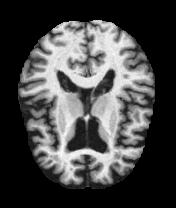

In [12]:
PIL.Image.open(str(mild[0])) #PIL is famous pillow library from python

In [13]:
moderate = list(data_dir.glob('ModerateDemented/*'))
moderate[:5]

[PosixPath('/content/gdrive/MyDrive/dataset/photos/ModerateDemented/30 (2).jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/ModerateDemented/29 (2).jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/ModerateDemented/30.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/ModerateDemented/29.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/ModerateDemented/28 (2).jpg')]

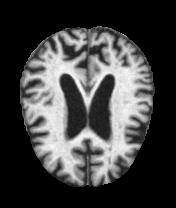

In [14]:
moderate = list(data_dir.glob('ModerateDemented/*'))
PIL.Image.open(str(moderate[0]))

In [15]:
no = list(data_dir.glob('NonDemented/*'))
no[:5]

[PosixPath('/content/gdrive/MyDrive/dataset/photos/NonDemented/nonDem1460.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/NonDemented/nonDem1585.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/NonDemented/nonDem2052.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/NonDemented/nonDem2314.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/NonDemented/nonDem1310.jpg')]

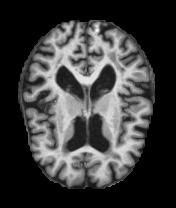

In [16]:
no = list(data_dir.glob('NonDemented/*'))
PIL.Image.open(str(no[0]))

In [17]:
verymild = list(data_dir.glob('VeryMildDemented/*'))
verymild[:5]

[PosixPath('/content/gdrive/MyDrive/dataset/photos/VeryMildDemented/verymildDem195.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/VeryMildDemented/verymildDem1722.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/VeryMildDemented/verymildDem1791.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/VeryMildDemented/verymildDem1537.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/VeryMildDemented/verymildDem751.jpg')]

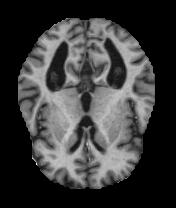

In [18]:
moderate = list(data_dir.glob('VeryMildDemented/*'))
PIL.Image.open(str(verymild[0]))

In [19]:
alzheimer_images_dict = {                                    #here we have created a dictionary, if we do 
    'mild': list(data_dir.glob('MildDemented/*')),           #alzheimer_images_dict[MildDemented] we get all paths of 
    'moderate': list(data_dir.glob('ModerateDemented/*')),   #milddemented
    'no': list(data_dir.glob('NonDemented/*')),
    'verymild': list(data_dir.glob('VeryMildDemented/*')),
  
}

In [20]:
alzheimer_labels_dict = {   #here I am assigning labels to each of the  classes
    'mild': 0,
    'moderate': 1,
    'no': 2,
    'verymild': 3,
    
}

In [21]:
alzheimer_images_dict['mild'][:5]

[PosixPath('/content/gdrive/MyDrive/dataset/photos/MildDemented/mildDem444.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/MildDemented/mildDem158.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/MildDemented/mildDem141.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/MildDemented/mildDem186.jpg'),
 PosixPath('/content/gdrive/MyDrive/dataset/photos/MildDemented/mildDem477.jpg')]

In [22]:
str(alzheimer_images_dict['mild'][0])

'/content/gdrive/MyDrive/dataset/photos/MildDemented/mildDem444.jpg'

In [23]:
img = cv2.imread(str(alzheimer_images_dict['mild'][0])) 
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [24]:
img.shape  #means this image is of dimension 240*179 nad have rgb value as 3

(208, 176, 3)

In [25]:
cv2.resize(img,(180,180)).shape  # we resize the mild image to 180*180 pixels

(180, 180, 3)

In [26]:
for alzheimer_name, images in alzheimer_images_dict.items():
    print(alzheimer_name)
    print(len(images))

mild
896
moderate
64
no
3200
verymild
2240


In [27]:
X, y = [], []

for alzheimer_name, images in alzheimer_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(alzheimer_labels_dict[alzheimer_name])

In [28]:
X[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [29]:
y[0] #as from 0 to 896 all photos are of mild

0

In [30]:
y[1000]   # and after that moderte then no comes therefore no index is assigned to be 2 according to for loop that is above

2

In [31]:
X = np.array(X)
y = np.array(y)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Using Data **Augmentation** 

In [34]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

## **Original Image** 





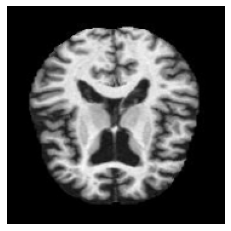

In [35]:
plt.axis('off')  
plt.imshow(X[0])

# **Newly generated training sample using data augmentation** 

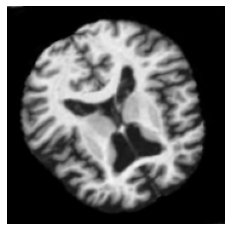

In [36]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("int")) #here I have called data augmentation as a func that will perfor data
                                                        #augmentation on the first image and also we have converted it to numpy 
                                                       #array from tensor

# Train the model using data augmentation and a drop out **layer**

In [37]:
num_classes = 4

model = Sequential([
  data_augmentation,    #here I have used data augmentation
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization( axis=1),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(axis=1),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(axis=1),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),   #here I have used dropout which will at random dropout 20% of random nueron at each pass
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=180)    

Epoch 1/180
150/150 [==============================] - 17s 30ms/step - loss: 1.9637 - accuracy: 0.4869
Epoch 2/180
150/150 [==============================] - 5s 30ms/step - loss: 1.0314 - accuracy: 0.5113
Epoch 3/180
150/150 [==============================] - 5s 30ms/step - loss: 0.9860 - accuracy: 0.5373
Epoch 4/180
150/150 [==============================] - 5s 30ms/step - loss: 0.9647 - accuracy: 0.5400
Epoch 5/180
150/150 [==============================] - 5s 30ms/step - loss: 0.9443 - accuracy: 0.5437
Epoch 6/180
150/150 [==============================] - 5s 30ms/step - loss: 0.9586 - accuracy: 0.5400
Epoch 7/180
150/150 [==============================] - 5s 30ms/step - loss: 0.9215 - accuracy: 0.5431
Epoch 8/180
150/150 [==============================] - 5s 30ms/step - loss: 0.9076 - accuracy: 0.5594
Epoch 9/180
150/150 [==============================] - 5s 30ms/step - loss: 0.8966 - accuracy: 0.5635
Epoch 10/180
150/150 [==============================] - 5s 30ms/step - loss: 0.90

In [38]:
model.evaluate(X_test_scaled,y_test)

50/50 [==============================] - 1s 12ms/step - loss: 0.3302 - accuracy: 0.8744


[0.3302272856235504, 0.8743749856948853]

In [39]:
predictions2 = model.predict(X_test_scaled) #we get this array as we have used linear activation func at last
predictions2

array([[ -6.1979523, -36.962597 ,  11.265795 ,  10.73444  ],
       [ -3.1075864,  -9.829303 ,   2.7515862,   3.5215611],
       [ -7.2172813, -20.465805 ,   4.716052 ,   5.6309695],
       ...,
       [  5.2733026, -41.603477 ,  21.752237 ,  10.195509 ],
       [ -2.5705214, -39.930176 ,  16.810104 ,   8.626067 ],
       [ 25.287594 , -21.955372 ,  17.168282 ,  19.083834 ]],
      dtype=float32)

In [41]:
score2 = tf.nn.softmax(predictions2) #here softmax gives the normalised probability
score2

<tf.Tensor: shape=(1600, 4), dtype=float32, numpy=
array([[1.6398081e-08, 7.1429368e-22, 6.2979907e-01, 3.7020093e-01],
       [9.0230559e-04, 1.0867985e-06, 3.1619862e-01, 6.8289798e-01],
       [1.8783478e-06, 3.3114275e-12, 2.8599411e-01, 7.1400404e-01],
       ...,
       [6.9708399e-08, 3.0546347e-28, 9.9999034e-01, 9.5713331e-06],
       [3.8280672e-09, 2.2797555e-25, 9.9972099e-01, 2.7899514e-04],
       [9.9768579e-01, 3.0313389e-21, 2.9704435e-04, 2.0171350e-03]],
      dtype=float32)>

In [42]:
np.argmax(score2)

15

In [43]:
score2

<tf.Tensor: shape=(1600, 4), dtype=float32, numpy=
array([[1.6398081e-08, 7.1429368e-22, 6.2979907e-01, 3.7020093e-01],
       [9.0230559e-04, 1.0867985e-06, 3.1619862e-01, 6.8289798e-01],
       [1.8783478e-06, 3.3114275e-12, 2.8599411e-01, 7.1400404e-01],
       ...,
       [6.9708399e-08, 3.0546347e-28, 9.9999034e-01, 9.5713331e-06],
       [3.8280672e-09, 2.2797555e-25, 9.9972099e-01, 2.7899514e-04],
       [9.9768579e-01, 3.0313389e-21, 2.9704435e-04, 2.0171350e-03]],
      dtype=float32)>

In [44]:
new2=[]
ind2=[]
for i in range(0,len(score2)):
    maximum=-1
    for j in range(0,len(score2[i])):
        
        if score2[i][j]>maximum:
            maximum=score2[i][j]
            index=j
            
    ind2.append(index)       
    
    

print(ind2)

[2, 3, 3, 3, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 3, 0, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 0, 2, 3, 2, 1, 0, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 0, 2, 2, 0, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 0, 2, 1, 3, 2, 3, 2, 0, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 0, 2, 3, 3, 3, 2, 3, 2, 2, 2, 0, 2, 2, 0, 2, 2, 3, 2, 0, 2, 2, 0, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 0, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 3, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 0, 2, 0, 3, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 3, 2, 2, 2, 1, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 0, 3, 2, 3, 2, 0, 2, 2, 0, 2, 2, 3, 2, 3, 3, 2, 2, 0, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 0, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 0, 0, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 0, 0, 

In [45]:
y_test

array([3, 2, 3, ..., 2, 2, 0])

In [46]:
class_labels=["mild","moderate","no","verymild"]

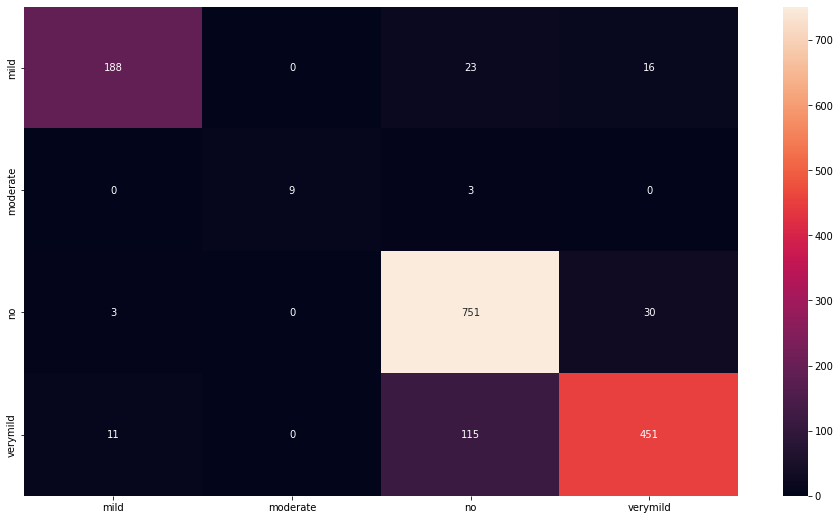

In [49]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
cm=confusion_matrix(y_test,ind2)
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [50]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,ind2,target_names=class_labels)
print (cr)

              precision    recall  f1-score   support

        mild       0.93      0.83      0.88       227
    moderate       1.00      0.75      0.86        12
          no       0.84      0.96      0.90       784
    verymild       0.91      0.78      0.84       577

    accuracy                           0.87      1600
   macro avg       0.92      0.83      0.87      1600
weighted avg       0.88      0.87      0.87      1600

